In [2]:
from DBQuerier import DBQuerier

import os

import pandas as pd
import numpy as np
# import seaborn as sns
# sns.set(style="ticks")
import ast

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (6, 4)
%matplotlib inline
fft_interval = 5.13980000
from crawlab_toolbox import plotting as genplt
from scipy import signal

In [3]:
querier = DBQuerier('db18','MMM-EMCO-E350')

In [4]:
query = """SELECT dateTime,RMS.values from db18.RMS where
             RMS.dateTime between '2020-01-17 14:57:26.535' and '2020-01-17 15:16:41.560'
             and assetId = 'MMM-EMCO-E350'
        order by RMS.dateTime asc;"""
cursor = querier.execute_query(query)
data = cursor.fetchall()
dateTime = [data[i][0] for i in range(len(data))]
RMS = np.array([[float(data[i][1]) for i in range(len(data))]]).T
dateTime_RMS = np.array([(dateTime[i] - dateTime[0]).total_seconds()/60 for i in range(len(dateTime))])

In [6]:
query = """SELECT dateTime,value from db18.Controller where
             Controller.dateTime between '2020-01-17 14:57:26.535' and '2020-01-17 15:16:41.560' 
             and dataItemId = 'rotaryVelocityS'
        order by Controller.dateTime asc ;"""
cursor = querier.execute_query(query)
data = cursor.fetchall()
dateTime = [data[i][0] for i in range(len(data))]
rotaryVelocityS = np.array([[float(data[i][1]) for i in range(len(data))]]).T
dateTime_rotaryVelocity = np.array([(dateTime[i] - dateTime[0]).total_seconds()/60 for i in range(len(dateTime))])

In [7]:
query = """SELECT dateTime,value from db18.Controller where
             Controller.dateTime between '2020-01-17 14:57:26.535' and '2020-01-17 15:16:41.560' 
             and dataItemId = 'rotaryVelocityS_Commanded'
        order by Controller.dateTime asc ;"""
cursor = querier.execute_query(query)
data = cursor.fetchall()
dateTime = [data[i][0] for i in range(len(data))]
rotaryVelocityS_Commanded = np.array([[float(data[i][1]) for i in range(len(data))]]).T
dateTime_rotaryVelocity_Commanded = np.array([(dateTime[i] - dateTime[0]).total_seconds()/60 for i in range(len(dateTime))])

In [8]:
spindleSpeed = np.hstack((dateTime_rotaryVelocity[...,np.newaxis],rotaryVelocityS))
np.save('data/SpindleSpeed.npy',spindleSpeed)

RMS = np.hstack((dateTime_RMS[...,np.newaxis],RMS))
np.save('data/RMS.npy',RMS)

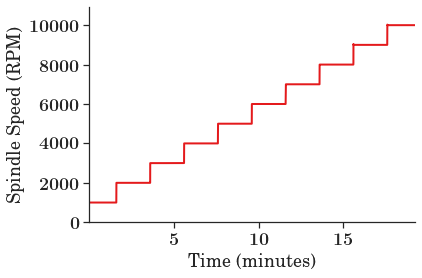

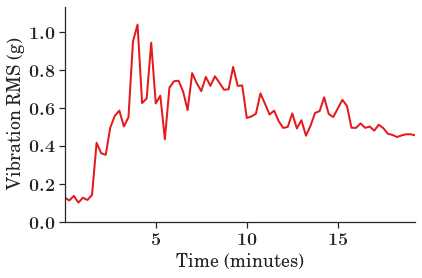